Hypothesis Testing and T Test Exercises

In [50]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data

Ho: On average, there is no difference in salaries between employees in the finance department and employees in the marketing department. 
Ha: There is a difference in salaries between employees in the finance department and the employees in the marketing department. 

Ho: There is no difference in number of employees in the finance dept and employees 
Ha: There is a difference in number of employees in the finance dept and employees.



# #T Test Exercises


In [2]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

deg_free = n1 + n2 - 2

s_p = sqrt(((n1-1) * s1**2 +(n2-1) * s2**2)/(deg_free))
s_p

17.956702977389302

In [3]:
standard_error = se = sqrt(s1**2/n1 + s2**2/n2)

t=(xbar1 - xbar2)/ (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [4]:
p = stats.t(deg_free).cdf(t)*2
p

0.01020985244923939

In [5]:
print(f't= {t:.4f}')
print(f'p = {p:.4f}')

t= -2.6252
p = 0.0102


In [6]:
t,p = stats.ttest_ind_from_stats(mean1=90,std1=15, nobs1 = 40, mean2=100, std2 = 20, nobs2=50, equal_var=False)

In [7]:
t,p

(-2.7091418459143854, 0.00811206270346016)

In [8]:
alpha = .05

In [9]:
if p < alpha:
    print("Reject null hypothesis, there is evidence to suggest there is a difference in sales")
else: 
    print("Fail to reject null hypothesis")

Reject null hypothesis, there is evidence to suggest there is a difference in sales


Load the mpg dataset and use it to answer the following questions:

In [10]:
mpg_df = data('mpg')
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [11]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
list(mpg_df['year'].unique())

[1999, 2008]

In [12]:
mpg_df['fuel_efficiency'] = (mpg_df.hwy + mpg_df.cty)/2

In [13]:
cars_2008 = mpg_df[mpg_df.year==2008].fuel_efficiency
cars_1999 = mpg_df[mpg_df.year==1999].fuel_efficiency

In [14]:
#two tailed test, 2 samples

In [15]:
alpha = .05

<AxesSubplot:>

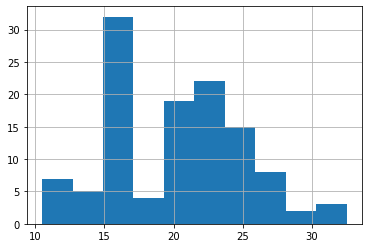

In [16]:
cars_2008.hist()

<AxesSubplot:>

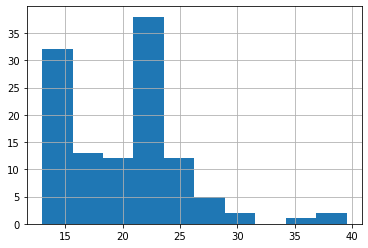

In [17]:
cars_1999.hist()

In [18]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [19]:
t,p = stats.ttest_ind(cars_2008, cars_1999)
t,p,alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [20]:
#Since p is greater than our alpha, we fail to reject the null hypothesis. 
#There is not sufficient evidence to suggest fuel efficiencies are different for cars made in 1999 or 2008.


Are compact cars more fuel-efficient than the average car?

In [21]:

mpg_df.head()
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [22]:
mpg_df = mpg_df.rename(columns = {'class': "car_type"})
compact_fuel = mpg_df[mpg_df.car_type=="compact"].fuel_efficiency


mpg_df = mpg_df['class']

In [23]:
list(mpg_df['car_type'].unique())

['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

In [24]:
def car_type(x):
    if x =="compact":
        return "compact"
    else:
        return "not_compact"
mpg_df["is_compact"] = mpg_df.car_type.apply(car_type)

average_fuel = mpg_df[mpg_df.is_compact =="not_compact"].fuel_efficiency

In [25]:
alpha = .05

<AxesSubplot:>

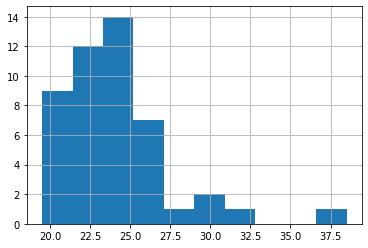

In [26]:
compact_fuel.hist()

<AxesSubplot:>

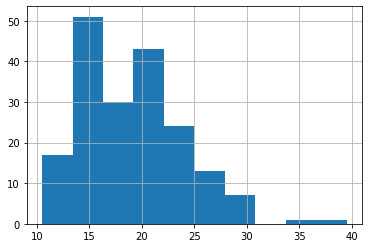

In [27]:
average_fuel.hist()

In [28]:
overall_mean = mpg_df.fuel_efficiency

In [29]:
t,p = stats.ttest_ind(compact_fuel,overall_mean,alternative="greater")
t,p,alpha

(5.260311926248542, 1.4342273079064686e-07, 0.05)

In [30]:
#P is less than alpha, so we reject null hypothesis.
#There is evidence to suggest compact cars are more fuel efficient than average.

Do manual cars get better gas mileage than automatic cars?

In [31]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact


In [32]:
def transmission(x):
    startswith = 'a'
    if x[0] in startswith:
        return "auto"
    else: 
        return "manual"


In [33]:
mpg_df["transmission"] = mpg_df.trans.apply(transmission)

In [34]:
auto = mpg_df[mpg_df.transmission =="auto"]
manual = mpg_df[mpg_df.transmission=="manual"]

mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact,auto


In [35]:
t,p=stats.ttest_ind(manual.fuel_efficiency,auto.fuel_efficiency, equal_var=False)

In [36]:
t,p/2,alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [37]:
#Since p is less than alpha, we fail to reject the null hypothesis.
#There is evidence to suggest automactic transmission cars have a lower fuel efficiency than manual.

# Correlation Exercises

In [38]:
telco_churn_df = pd.read_csv('Cust_Churn_Telco - Cust_Churn_Telco.csv')

In [39]:
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
telco_churn_df.dropna()
telco_churn_df_nn = telco_churn_df.dropna()

In [41]:
x = telco_churn_df['tenure']
y = telco_churn_df['MonthlyCharges']

(100.0, 123.775)

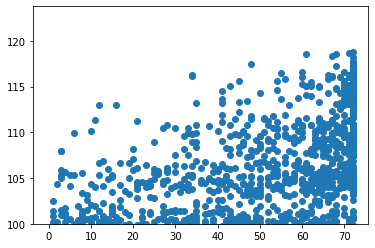

In [42]:
plt.scatter(x,y)
plt.ylim(100)

In [43]:
corr, p = stats.pearsonr(x,y)

In [44]:
corr

0.24789985628615002

In [45]:
p

4.0940449915016345e-99

In [46]:
#There is a weak correlation between tenure and monthly charges. 

In [47]:
x = telco_churn_df_nn.tenure
y = telco_churn_df_nn.TotalCharges

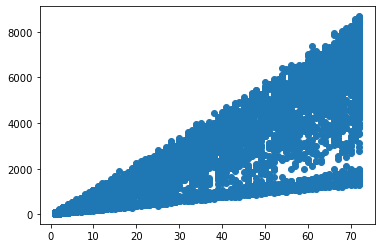

In [48]:
plt.scatter(x,y)

In [49]:
corr, p = stats.pearsonr(x,y)

In [50]:
corr

0.825880460933202

In [51]:
p

0.0

In [52]:
#Strong positive correlation, we reject the null hypothesis. Significant evidence to suggest there is a linear relationship between tenure and total charges

In [53]:
#What happens if you control for phone and internet service?

In [54]:
x = telco_churn_df_nn.TotalCharges.where(telco_churn_df_nn.PhoneService == "Yes")
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.PhoneService== "Yes")

In [55]:
x= x.dropna()
y=y.dropna()

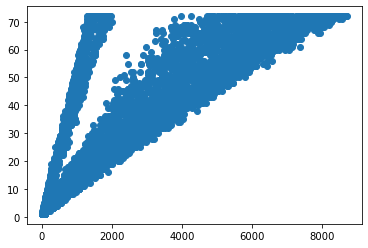

In [56]:
plt.scatter(x,y)

In [57]:
corr, p = stats.pearsonr(x,y)



In [58]:
telco_churn_df_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [59]:
telco_churn_df_nn.InternetService()

TypeError: 'Series' object is not callable

In [ ]:
corr

In [ ]:
p

In [ ]:
x = telco_churn_df_nn.TotalCharges.where(telco_churn_df_nn.PhoneService == "No")
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.PhoneService== "No")

In [ ]:
x = x.dropna()
y=y.dropna()

In [ ]:
plt.scatter(x,y)

In [ ]:
corr, p = stats.pearsonr(x,y)

In [ ]:
corr

In [ ]:
p

In [ ]:
list(telco_churn_df_nn['InternetService'].unique())

In [ ]:
telco_churn_df["no_internet"] = telco_churn_df.InternetService.str.contains("No")

In [ ]:
telco_churn_df.head()
telco_churn_df = telco_churn_df.dropna()

In [ ]:
x = telco_churn_df.TotalCharges.where(telco_churn_df.no_internet==False)
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.no_internet==False)

In [ ]:
x = x.dropna()
y = y.dropna()

In [ ]:
plt.scatter(x,y)

In [ ]:
corr, r = stats.pearsonr(x,y)

In [ ]:
corr

In [ ]:
r

In [ ]:
#There is a strong positive correlation between customers with internet service and tenure.
#Reject the null hypothesis, there's evidence to suggest a linear relationship between internet service and tenure.

In [ ]:
x = telco_churn_df.TotalCharges.where(telco_churn_df.no_internet==True)
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.no_internet==True)


In [ ]:
x=x.dropna()
y=y.dropna()

In [ ]:
plt.scatter(x,y)

In [ ]:
corr, p = stats.pearsonr(x,y)

In [ ]:
corr

In [ ]:
p

In [ ]:
#Strong positive correlation between customers with no internet service and tenure.
#There is a relationship between total charges of customers with no internet service and tenure. 
#Significant p value, we reject the null hypothesis. 

In [ ]:
from env import username, password, host

In [60]:
from env import get_db_url

In [62]:
employees_url = get_db_url('employees')

In [66]:
employees_df = pd.read_sql('select * from employees join salaries on salaries.emp_no = employees.emp_no where to_date > curdate()',employees_url)

In [67]:
employees_df.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01


In [73]:
from datetime import date
date.today()

datetime.date(2021, 5, 11)

In [76]:
employees_df['tenure_in_days']= (date.today() - employees_df['hire_date']).dt.days

In [117]:
employees_df.head(100)

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,tenure_in_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,12738
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,12955
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,12675
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,12580
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,11564
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,59755,2001-08-02,9999-01-01,11666
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,10007,88070,2002-02-07,9999-01-01,11778
7,10009,1952-04-19,Sumant,Peac,F,1985-02-18,10009,94409,2002-02-14,9999-01-01,13231
8,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,80324,2001-11-23,9999-01-01,11583
9,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,10012,54423,2001-12-16,9999-01-01,10371


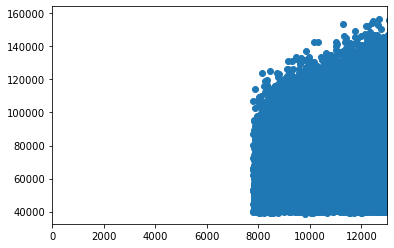

In [123]:
x = employees_df.tenure_in_days
y=employees_df.salary
plt.xlim(0,13000)
plt.scatter(x,y)

In [79]:
corr, p = stats.pearsonr(x,y)

In [80]:
corr

0.3064625613186078

In [81]:
p

0.0

In [82]:
#There is a weak positive correlation between salary and tenure of the employee. 


In [83]:
titles_df = pd.read_sql('select * from titles', employees_url)

In [87]:
count_titles_df=titles_df.groupby('emp_no').count()


In [89]:
titles_and_count = pd.merge(titles_df, count_titles_df, how = 'left', on='emp_no')

In [91]:
titles_and_count.head(5)

,emp_no,title_x,from_date_x,to_date_x,title_y,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,1,1
1,10002,Staff,1996-08-03,9999-01-01,1,1,1
2,10003,Senior Engineer,1995-12-03,9999-01-01,1,1,1
3,10004,Engineer,1986-12-01,1995-12-01,2,2,2
4,10004,Senior Engineer,1995-12-01,9999-01-01,2,2,2


In [94]:
titles_and_count['tenure_in_days']= (date.today() - titles_and_count['from_date_x']).dt.days

In [103]:
x = titles_and_count.tenure_in_days
y = titles_and_count.title_y

In [104]:
corr, p = stats.pearsonr(x,y)

In [105]:
corr, p

(0.07658055230442137, 0.0)

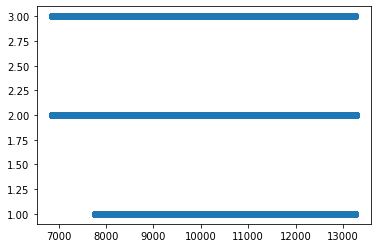

In [106]:
plt.scatter(x,y)

In [107]:
sleep_df = data('sleepstudy')

In [108]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [109]:
x = sleep_df.Days
y = sleep_df.Reaction

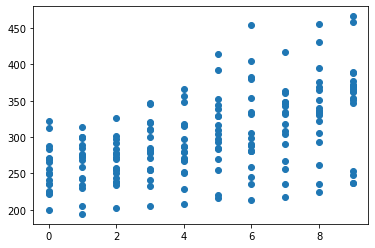

In [110]:
plt.scatter(x,y)

In [111]:
corr, p = stats.pearsonr(x,y)

In [112]:
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [2]:
#moderately positive relationship between days and reaction time

# Chi Squared Exercises

In [47]:
a = .01

In [43]:
index = ['mac_user', 'not_mac_user']
columns = ['Codeup_student', 'Non_Codeup_student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()


In [44]:
observed

,Codeup_student,Non_Codeup_student
mac_user,49,20
not_mac_user,1,30


In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [46]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [48]:
if p < a:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


In [49]:
#There is evidence to suggest that being a mac user and codeup student are not independent. 

In [52]:
mpg_df = data('mpg')

In [58]:
mpg_df['transmission'] = mpg_df['trans'].str[:4]

In [64]:
observed = pd.crosstab(mpg_df.transmission, mpg_df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
transmission,,,,,,,
auto,2,24,29,11,20,16,55
manu,3,23,12,0,13,19,7


In [65]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [66]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 2 24 29 11 20 16 55]
 [ 3 23 12  0 13 19  7]]
---
Expected

[[ 3.35470085 31.53418803 27.50854701  7.38034188 22.14102564 23.48290598
  41.5982906 ]
 [ 1.64529915 15.46581197 13.49145299  3.61965812 10.85897436 11.51709402
  20.4017094 ]]
---

chi^2 = 33.7700
p     = 0.0000


In [68]:
if p < a:
    print("Reject null hypothesis, transmission and class type are not independent")
else:
    print("Fail to reject null hypothesis, transmission and class type are independent")

Reject null hypothesis, transmission and class type are not independent


3.) Use the data from the employees database to answer these questions:

In [71]:
from env import get_db_url
url = get_db_url('employees')

In [74]:
pd.read_sql("""select emp_no, dept_no, from_date, to_date, gender, dept_name 
from dept_emp
join employees using(emp_no)
join departments using(dept_no)
where to_date > curdate()
""",url)

,emp_no,dept_no,from_date,to_date,gender,dept_name
0,10038,d009,1989-09-20,9999-01-01,M,Customer Service
1,10049,d009,1992-05-04,9999-01-01,F,Customer Service
2,10060,d009,1992-11-11,9999-01-01,M,Customer Service
3,10088,d009,1992-03-21,9999-01-01,F,Customer Service
4,10112,d009,1998-05-01,9999-01-01,F,Customer Service
...,...,...,...,...,...,...
240119,499966,d007,1985-06-13,9999-01-01,F,Sales
240120,499976,d007,1988-12-26,9999-01-01,M,Sales
240121,499980,d007,1991-02-11,9999-01-01,M,Sales
240122,499986,d007,1985-08-11,9999-01-01,F,Sales
